In [3]:
import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import pywt

In [2]:
model = joblib.load('indian_foreign_logisticRegression.pkl')

FileNotFoundError: ignored

### test image

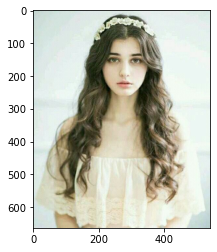

In [ ]:
image = cv2.imread('test_data/foreign-664.jpg')
img_show = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

### preprocessing

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier('haarcascades/Nariz.xml')

In [ ]:
def get_cropped_image_if_2_eyes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
def get_cropped_image_color(img):
    #img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    nose = nose_cascade.detectMultiScale(gray)
    for (x,y,w,h) in nose:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        return roi_color  

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [ ]:
img = get_cropped_image_if_2_eyes(image)

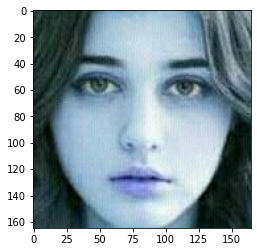

In [ ]:
try:
    plt.imshow(img)
except Exception as e:
    img = image
    plt.imshow(image)

In [ ]:
scalled_raw_img = cv2.resize(img, (32, 32))
gray1 = cv2.cvtColor(scalled_raw_img, cv2.COLOR_BGR2GRAY)
img_har = w2d(img,'db1',5)
col_feature = get_cropped_image_color(img)
try:
    scalled_col_feature = cv2.resize(col_feature, (32, 32))
except Exception as col:
    scalled_col_feature = cv2.resize(img, (32,32))
gray2 = cv2.cvtColor(scalled_col_feature, cv2.COLOR_BGR2GRAY)
scalled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),
                          scalled_img_har.reshape(32*32,1),
                          scalled_col_feature.reshape(32*32*3,1)))
com_show = np.vstack((gray1, scalled_img_har, gray2))


### 3 features vertically stacked(input image)

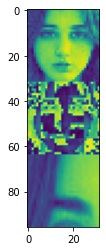

In [ ]:
plt.imshow(com_show)

In [ ]:
test = combined_img.reshape(1, len(combined_img)).astype(float)

### "[0]" => foreigner  and    "[1]" => indian

In [ ]:
model.predict(test)

array([0])

In [ ]:
model.predict_proba(test)

array([[0.95070727, 0.04929273]])